In [2]:
# # material usage over time

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px

In [3]:
# load the data
data = pd.read_csv("/users/charles/desktop/pytorch-examples-tutorials/historical-material-data.csv")

In [4]:

data["Date"] = pd.to_datetime(data["Date"])
print("test")

test


In [5]:
# plot material usage over time
# sns.lineplot(data = data, x="Date", y="Quantity", hue="Material_Type")
# plt.title("Material usage over time")
# plt.show()

In [6]:
# using plotly's api to add the features
fig = px.line(data, x="Date", y="Quantity", color="Material_Type", title="Material usage over time", 
            labels={"Quantity": "Usage_Quantity", "Date": "Date", "Material_Type":"Material_Type"}, 
            template="plotly_dark")

fig.update_xaxes(rangeslider_visible=True)

# add annotations (example: annotate maximum value, can be customized further)
max_point = data[data["Quantity"] == data["Quantity"].max()]
fig.add_annotation(x=max_point["Date"].values[0], y= max_point["Quantity"].values[0], text="Maximum", showarrow =True, arrowhead= 1)

fig.show()
plt.show()

In [7]:
# heatmap of material and product type

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [8]:
# load the data 
df = pd.read_csv("/users/charles/desktop/pytorch-examples-tutorials/historical-material-data.csv")

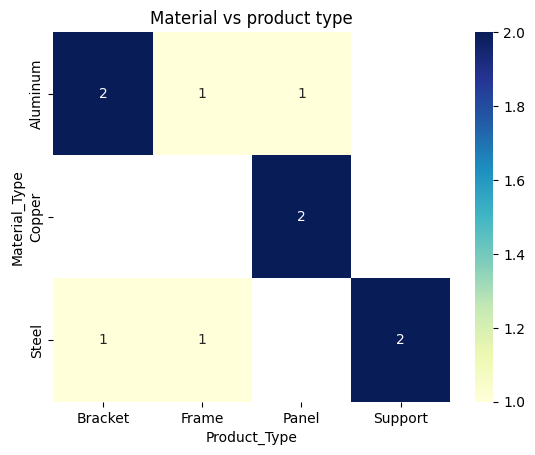

In [9]:
# print(df.tail())

heatmap_data = df.groupby(["Material_Type", "Product_Type"]).size().unstack()
sns.heatmap(heatmap_data, annot=True ,cmap="YlGnBu")
plt.title("Material vs product type")
plt.show()

In [13]:
# heatmap of material and product type using plotly
import pandas as pd
import plotly.figure_factory as ff

In [10]:
# load the data
df = pd.read_csv("https://raw.githubusercontent.com/charlesanthony1996/billionaires_dataset/main/historical-material-data.csv")

In [11]:
# heatmap data
heatmap_data = df.groupby(["Material_Type", "Product_Type"]).size().unstack(fill_value = 0)

In [14]:
# create a heatmap using plotly
fig = ff.create_annotated_heatmap(
    z= heatmap_data.values,
    x= heatmap_data.columns.tolist(),
    y= heatmap_data.index.tolist(),
    colorscale="Viridis",
    showscale=True,
    annotation_text=heatmap_data.values
)

In [36]:
# update layout
fig.update_layout(title="Material vs Product type", xaxis_title="Product Type", yaxis_title="Material Type")

fig.show()
plt.show()

In [16]:
# histogram of bend angles (assuming bend angles are comma seperated)
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [17]:
df = pd.read_csv("https://raw.githubusercontent.com/charlesanthony1996/billionaires_dataset/main/historical-material-data.csv")

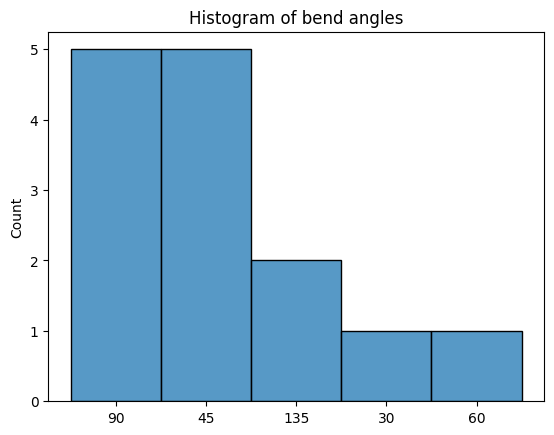

In [18]:
# print(df.info())

# expanding the angles column
angles = data["Angles"].str.split(",", expand=True).stack()
sns.histplot(angles, bins=30)
plt.title("Histogram of bend angles")
plt.show()

In [19]:
import pandas as pd
import plotly.express as px

In [20]:
# sample data loading (adjust the path as needed)
df = pd.read_csv("https://raw.githubusercontent.com/charlesanthony1996/billionaires_dataset/main/historical-material-data.csv")

In [21]:
print(df.head())

         Date  Order_ID Product_Type Material_Type  Thickness_mm  Length_mm  \
0  2021-01-01         1        Panel      Aluminum           2.0       1000   
1  2021-01-05         2      Bracket         Steel           3.0        200   
2  2021-01-10         3        Frame      Aluminum           4.0       2000   
3  2021-01-15         4      Support         Steel           6.0       1000   
4  2021-01-20         5        Panel        Copper           2.0       1000   

   Width_mm  Number_of_Bends     Angles  Bend_Lengths  Quantity  Unit_Price  \
0       500                0        NaN           NaN        10          20   
1       100                2      90,45        100,50        25          10   
2      1000                3  90,45,135  1000,500,250         5         100   
3       200                1         90           500        20          30   
4       500                0        NaN           NaN        15          25   

   Total_Cost  Sides  
0         200      1  
1   

In [22]:
# expanding the angles column
angles = df["Angles"].str.split(",", expand=True).stack().astype(float).reset_index(drop=True)

In [74]:
# create histogram using plotly
fig = px.histogram(angles,nbins=30, title="Histogram of bend angles", labels={'value': 'Bend Angles', 'count': 'Frequency'},
 color_discrete_sequence=['#636EFA'], marginal="box")

fig.add_shape(type="line", x0=angles.median(), x1=angles.median(), y0=0, y1=1, yref="paper",
 line=dict(color="green", width= 2, dash="dash"), name="Median")

fig.update_layout(xaxis_title="Bend angles(degrees)", yaxis_title="Frequency", legend_title="Statistics", hovermode="closest")

fig.show()
plt.show()

In [24]:
# scatter plot for thickness vs quantity (proxy for wastage)
# import matplotlib.pyplot as plt
# import seaborn as sns
# import numpy as np
# import pandas as pd

# df = pd.read_csv("/users/charles/desktop/pytorch-examples-tutorials/historical-material-data.csv")

# print(df.head())

# sns.scatterplot(data = data, x="Thickness_mm", y="Quantity", hue="Material_Type")
# plt.title("Thickness vs Quantity")
# plt.show()

In [25]:
import pandas as pd
import plotly.express as px

In [68]:
# load the data (adjust the path as needed)
df = pd.read_csv("https://raw.githubusercontent.com/charlesanthony1996/billionaires_dataset/main/historical-material-data.csv")

In [69]:
# create scatter plot using plotly
fig = px.scatter(df,x="Thickness_mm", y="Quantity", color="Material_Type", title="Thickness vs Quantity",
 labels={"Thickness_mm": "Thickness (mm)", 'Quantity': 'Quantity ordered'}, hover_data=["Material_Type"])

In [70]:
# add reference lines if needed (average thickness and average quantity)
avg_thickness = df["Thickness_mm"].mean()
avg_quantity = df["Quantity"].mean()

In [73]:
fig.add_shape(type="line", x0=avg_thickness, x1=avg_thickness, y0=0, y1=df["Quantity"].max(),
line=dict(color="Red", width=2, dash="dash"))

fig.add_shape(type="line", x0=0, x1=df["Thickness_mm"].max(), y0=avg_quantity, y1=avg_quantity,
line=dict(color="Blue", width=2, dash="dash"))

fig.update_layout(hovermode="closest", template="plotly_dark")

fig.show()
plt.show()
